In [1]:
import warnings

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
import torch
import pddp
import pddp.models.gpytorch

In [5]:
state_size = 2
action_size = 1
N = 100
encoding = 2

In [6]:
X_ = torch.randn(N, state_size)
U_ = torch.randn(N, action_size)
Y_ = X_.sin()
if state_size == 2:
    Y_ = torch.stack([X_[..., 0].sin(), X_[..., 1].cos()], dim=-1)
Y_ += 1e-2 * torch.randn_like(X_)
dX = Y_ - X_

In [7]:
gp = pddp.models.gpytorch.gpytorch_dynamics_model_factory(state_size, action_size)()

In [8]:
gp.fit(X_, U_, dX, learning_rate=0.1, n_iter=50)

In [9]:
def plot_variance(X, Y, encoding, indices=None, std_scale=1.0):
    mean_ = pddp.utils.encoding.decode_mean(Y, encoding)
    std_ = pddp.utils.encoding.decode_std(Y, encoding)
    
    colors = ["C0", "C1", "C2", "C3"]
    if indices is None:
        indices = list(range(mean_.shape[-1]))

    plt.figure(figsize=(12, 6))
    for index in indices:
        x = X[:, index].detach().numpy()
        mean = mean_[:, index].detach().numpy()
        std = std_[:, index].detach().numpy()

        plt.scatter(X_[:, index].detach().numpy(),
                    Y_[:, index].detach().numpy(),
                    color=colors[index], marker='s')
        plt.plot(x, mean, color=colors[index])

        for i in range(1, 4):
            j = std_scale * i
            plt.gca().fill_between(
                x.flat, (mean - j * std).flat, (mean + j * std).flat,
                color=colors[index], alpha=1.0 / (i + 2))

    plt.ylim(-5, 5)

    plt.show()

In [10]:
test_x = torch.linspace(-5, 5, 100).unsqueeze(1).repeat(1, state_size)
Z = torch.cat([test_x, torch.ones_like(test_x)], dim=-1)
U = torch.randn(100, action_size)

In [11]:
output = gp(Z, U, 0, encoding=encoding)

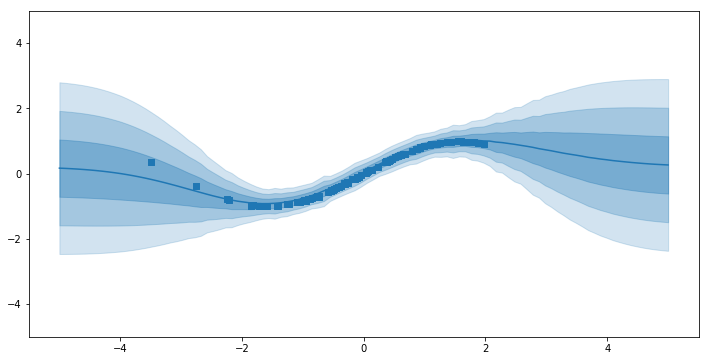

In [12]:
plot_variance(test_x, output, encoding, [0])

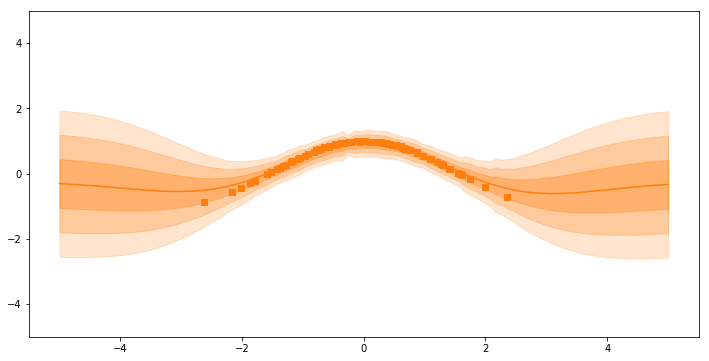

In [13]:
if state_size > 1:
    plot_variance(test_x, output, encoding, [1])